<a href="https://colab.research.google.com/github/hackergod00001/language_detection_using_nlp/blob/master/Language_Detection_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract:
## Problem Statement:
Using the text we have to create a model which will be able to predict the given language.


**We are using the Naive-Bayes algorithm for our model creation. Later we are training the model using the training data set.**

### What is language detection?
* Using natural language processing(NLP), language detection determines which natural language the given content is in. Computational approaches to this problem,
* view it as a special case of text categorization, solved with various statistical methods. 
* Most NLP applications tend to be language-specific and therefore require monolingual data. To build an application in your target language, you may need to apply a preprocessing technique that filters out text written in non-target languages. This requires proper identification of the language of each input.

# About the dataset

We are using the Language Detection dataset, which contains text details for 17 different languages.

Languages are:

* English

* Portuguese

* French

* Greek

* Dutch

* Spanish

* Japanese

* Russian

* Danish

* Italian

* Turkish

* Swedish

* Arabic

* Malayalam

* Hindi

* Tamil

* Telugu


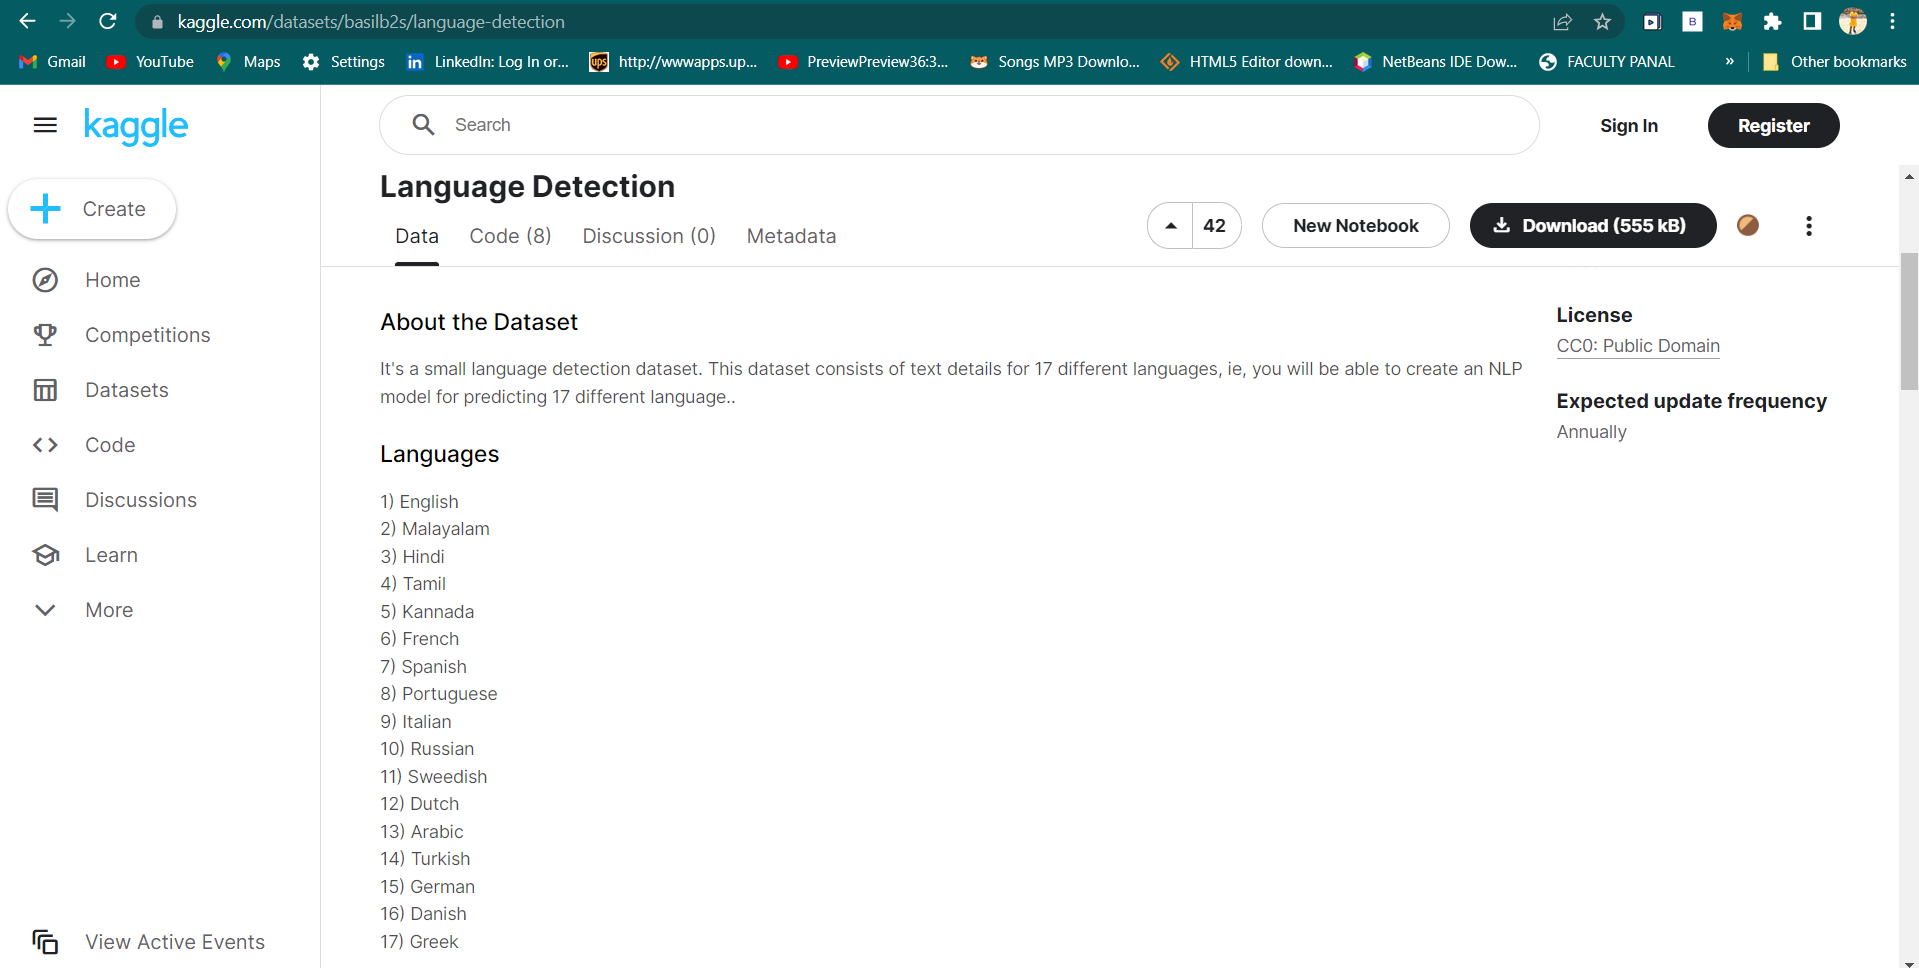

by using the given (input) text sentences we have to create a model which will be able to predict the given language. 


## Application in real world or Uses
* Widely used in almost all the mobile phones,  laptops, etc for machine translation, text language translatore's and also on robots. 

* It helps in tracking and identifying multilingual documents too. 

# Implementation

### Import all the required libraries and dataset

In [35]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

### import the language detection dataset

In [36]:
data = pd.read_csv("Language Detection.csv")
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [37]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

## Separating - Independent and Dependent features
basically we are separate the dependent and independent variables, here:
* text data is the independent variable & 
* the language name is the dependent variable.

In [38]:
X = data["Text"]
y = data["Language"]

## Label Encoding
Now our output variable:
the name of languages is a categorical variable. 

For training the model we should have to convert it into a numerical form, 

so we are performing label encoding on that output variable. 

For this process, we are importing LabelEncoder from sklearn.

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Text Preprocessing
This is a dataset that was created using scraping the Wikipedia, so it contains many unwanted symbols, numbers which will affect the quality of our model. 

So we should perform text preprocessing techniques.

In [40]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

## Bag of Words
As we all know that, not only the output feature but also the input feature should be of the numerical form. 

So we are converting text into numerical form by creating a **Bag of Words** model **using CountVectorizer**.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(10337, 34937)

## Train Test Splitting

Thus, preprocessed our input and output variable. 

The next step was to create the training set,

for training the model and test set, for evaluating the test set. For this process, we are using a train test split.

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Model Training and Prediction

Now almost there, 

the model creation part. 

We are using the **naive_bayes algorithm** for our model creation.

Later we are training the model using the training set.

In [43]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

So we’ve trained our model using the training set. Now let’s predict the output for the test set.

In [44]:
y_pred = model.predict(x_test)

## Model Evaluation
Now we can evaluate our model

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9792069632495164


The accuracy of the model is 0.97 which is very good and our model is performing well. 

Now let’s plot the confusion matrix using the seaborn heatmap.

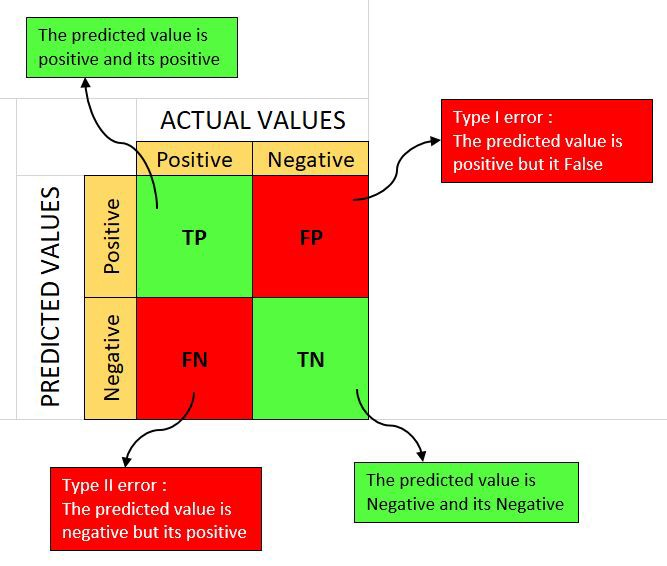

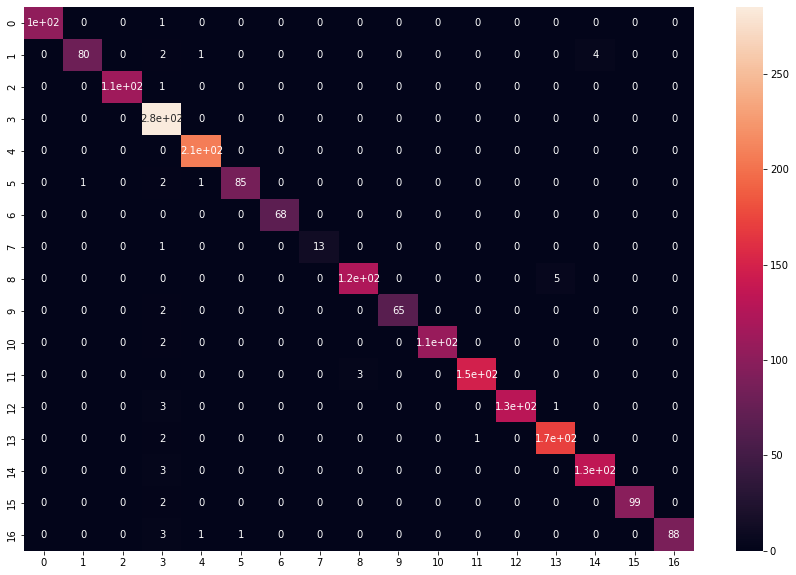

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

When looking into each language, almost all the predictions are right. And yes !! you are almost there !!



Predicting with some more 

Now let’s test the model prediction using text in different languages.

In [55]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [56]:
# English
predict("Ramu provides a community based knowledge portal for Analytics and Data Science professionals")

The langauge is in English


In [57]:
# French
predict("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")

The langauge is in French


In [58]:
# Arabic
predict("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")

The langauge is in Arabic


In [59]:
# Spanish
predict("Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")

The langauge is in Spanish


## Conclusion:

* This definitely given us a diagram of basic NLP programs. You need to analyze the data and preprocess it accordingly. 

* A bag of words model becomes a way of representing your text data. 

* Text extraction and vectorization are important steps for good predictions in NLP. 

* Naive Bayes always proves to be a better model in such text classification problems, hence more accurate results we get.